In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('../data/sentiment_analysis/news_data.csv')

In [ ]:
data.head()

,headline,description,date
0,Gaza’s jour­nal­ists: ‘Tar­gets’ or ‘ca­su­al­...,Gaza’s jour­nal­ists are be­ing killed at an u...,23-12-2023
1,Is­rael or­ders ‘death cor­ri­dor’ evac­u­a­ti...,Hun­dreds of Pales­tini­ans were forced to eva...,23-12-2023
2,"Is­rael’s war on Gaza: List of key events, day 78",UN Se­cu­ri­ty Coun­cil pass­es res­o­lu­tion ...,23-12-2023
3,US ac­cus­es Iran of be­ing ‘deeply in­volved’...,White House says Tehran is pro­vid­ing Yemeni ...,23-12-2023
4,Is­raeli forces con­tin­ue at­tacks amid crit­...,The wa­tered-down res­o­lu­tion boost­ing aid ...,23-12-2023


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3338 entries, 0 to 3337
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headline     3338 non-null   object
 1   description  3338 non-null   object
 2   date         3338 non-null   object
dtypes: object(3)
memory usage: 78.4+ KB


In [ ]:
data.describe()

,headline,description,date
count,3338,3338,3338
unique,3331,3337,692
top,Is­raeli forces kill Pales­tin­ian teenag­er i...,As the con­flict be­tween Is­rael and Gaza en­...,17-10-2023
freq,4,2,39


In [ ]:
data.isnull().sum()

headline       0
description    0
date           0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

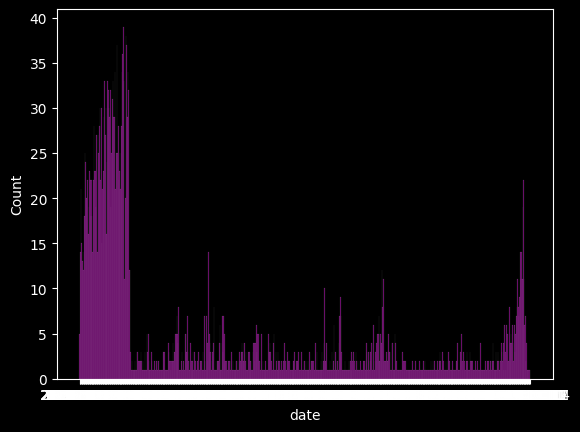

In [ ]:
sns.histplot(data['date'], color='purple')
plt.show

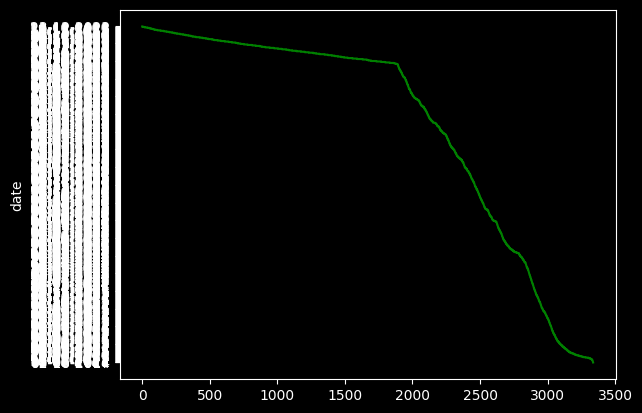

In [ ]:
sns.lineplot(data['date'], color='green')
plt.show()

In [ ]:
!pip install nltk

In [ ]:
!pip install wordcloud

In [ ]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from wordcloud import WordCloud,STOPWORDS 
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 

In [ ]:
!pip install spacy

In [ ]:
!pip install textblob

In [ ]:
import re
import string 
import unicodedata
import spacy
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer 
from sklearn.linear_model import LinearRegression 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score 
from bs4 import BeautifulSoup

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/pancake/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
tokenizers=ToktokTokenizer()
stopwords=nltk.corpus.stopwords.words('english')

In [ ]:
def noiseremoval_text(text):
    text = re.sub('\[[^]]*\]', '',text)
    return text 

In [ ]:
data['description']=data['description'].apply(noiseremoval_text)

In [ ]:

# Preprocessing function
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  
    text = re.sub(r'[^\w\s]', '', text)  
    text = text.lower()  
    return text

In [ ]:
data['cleaned_text'] = data['description'].apply(clean_text)

In [ ]:
data.head()

,headline,description,date,cleaned_text
0,Gaza’s jour­nal­ists: ‘Tar­gets’ or ‘ca­su­al­...,Gaza’s jour­nal­ists are be­ing killed at an u...,23-12-2023,gazas journalists are being killed at an unpre...
1,Is­rael or­ders ‘death cor­ri­dor’ evac­u­a­ti...,Hun­dreds of Pales­tini­ans were forced to eva...,23-12-2023,hundreds of palestinians were forced to evacua...
2,"Is­rael’s war on Gaza: List of key events, day 78",UN Se­cu­ri­ty Coun­cil pass­es res­o­lu­tion ...,23-12-2023,un security council passes resolution to boost...
3,US ac­cus­es Iran of be­ing ‘deeply in­volved’...,White House says Tehran is pro­vid­ing Yemeni ...,23-12-2023,white house says tehran is providing yemeni re...
4,Is­raeli forces con­tin­ue at­tacks amid crit­...,The wa­tered-down res­o­lu­tion boost­ing aid ...,23-12-2023,the watereddown resolution boosting aid to gaz...


In [ ]:
def stemmer(text):
    ps =nltk.porter.PorterStemmer()
    text =''.join((ps.stem(word) for word in text.split()))
    return text

In [ ]:
data['cleaned_text']=data['cleaned_text'].apply(stemmer)

In [ ]:
data.head()

,headline,description,date,cleaned_text
0,Gaza’s jour­nal­ists: ‘Tar­gets’ or ‘ca­su­al­...,Gaza’s jour­nal­ists are be­ing killed at an u...,23-12-2023,gazajournalistarebekillatanunprecedratepluisra...
1,Is­rael or­ders ‘death cor­ri­dor’ evac­u­a­ti...,Hun­dreds of Pales­tini­ans were forced to eva...,23-12-2023,hundrofpalestinianwereforctoevacubureijandnuse...
2,"Is­rael’s war on Gaza: List of key events, day 78",UN Se­cu­ri­ty Coun­cil pass­es res­o­lu­tion ...,23-12-2023,unsecurcouncilpassresoluttoboostaiddeliveritog...
3,US ac­cus­es Iran of be­ing ‘deeply in­volved’...,White House says Tehran is pro­vid­ing Yemeni ...,23-12-2023,whitehoussaytehranisprovidyemenirebelgroupwith...
4,Is­raeli forces con­tin­ue at­tacks amid crit­...,The wa­tered-down res­o­lu­tion boost­ing aid ...,23-12-2023,thewatereddownresolutboostaidtogazahabeencriti...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['cleaned_text'])

print(vectorizer.get_feature_names_out())
print(X.toarray())


['13yearoldgamerwatritobuildafollowonhiyoutubchannelbeforhewakillinanisraairattack'
 '15yearoldmohamdaadawakillbyisraforcwhileprotestillegsettlementintheoccupiwestbank'
 '18memberofonefamiliwerekillinisraairattackinthesoutherncitiofrafah' ...
 'younighassantayeh20wakillbytheisraarmidurearaidonthealfaraarefugecampneartuba'
 'zainabalqolaqwhoopenherartexhibitontuesdaylost22memberofherfamiliinanisrabomblastmay'
 'zakariahamayel28struckbyabullettothechestataprotestinbeitasouthofnabluhealthministrisay']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# import pandas as pd
# import re
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, accuracy_score


# y = data['sentiment']  


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# model = LogisticRegression()
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)


# print("Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))